In [49]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
for i in range(10):
    df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(i))
    df['date'] = df['date'].apply(lambda x: x[:-4] + str(int(x[-4:]) + 1000) if int(x[-4:]) < 1900 else x)
    df.to_csv('time_series/time_series_of_cluster_{}.csv'.format(i), index=False)

In [69]:
df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(0))

In [84]:
for i in range(10):
    df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(i))
    df['date'] = pd.to_datetime(df.date)
    df = df[df.date >= pd.to_datetime('2010-01-01')]
    df = df.sort_values(['date'])
    df.to_csv('time_series/time_series_of_cluster_{}.csv'.format(i), index=False)

In [85]:
for i in range(10):
    df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(i))
    df['date'] = pd.to_datetime(df.date)
    df = df.groupby(['date']).sum()
    idx = pd.date_range('2010-01-01', '2015-12-31')
    df = df.reindex(idx, fill_value=0)
    df.to_csv('time_series/time_series_of_cluster_{}.csv'.format(i))

In [89]:
for i in range(10):
    df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(i))
    df.columns = ['date', 'count']
    kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
    df['date'] = pd.to_datetime(df.date)
    df1 = df[df['date'] <= pd.to_datetime('2014-12-31')]
    df2 = df[df['date'] > pd.to_datetime('2014-12-31')]
    y = df1['count'].values
    y_truth = df2['count'].values
    pred_len = y.shape[0]
    total_len = df['count'].values.shape[0]
    x1 = np.arange(y.shape[0])
    x1 = x1.reshape(-1, 1)
    x2 = np.arange(y_truth.shape[0])
    x2 = x2.reshape(-1, 1)
    gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
    gp.fit(x1, y)
    y_pred, sigma = gp.predict(x2, return_std=True)
    print np.sqrt(np.square(y_truth - y_pred).sum()/365)

27.4328120671
19.7363778186
14.8869212185
42.3200631881
16.3427394023
34.5113332213
12.290267147
5.99137607952
16.7693568748
36.8901143825


In [90]:
df = pd.read_csv('time_series/time_series_of_cluster_{}.csv'.format(1))
df.columns = ['date', 'count']
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
df['date'] = pd.to_datetime(df.date)
df1 = df[df['date'] <= pd.to_datetime('2014-12-31')]
df2 = df[df['date'] > pd.to_datetime('2014-12-31')]
y = df1['count'].values
y_truth = df2['count'].values
pred_len = y.shape[0]
total_len = df['count'].values.shape[0]
x1 = np.arange(y.shape[0])
x1 = x1.reshape(-1, 1)
x2 = np.arange(y_truth.shape[0])
x2 = x2.reshape(-1, 1)
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(x1, y)
y_pred, sigma = gp.predict(x2, return_std=True)
print np.sqrt(np.square(y_truth - y_pred).sum()/365)

19.7363778186


In [22]:
df[:10]

,date,count
0,2010-01-01,270
1,2010-01-02,159
2,2010-01-03,119
3,2010-01-04,159
4,2010-01-05,165
5,2010-01-06,202
6,2010-01-07,210
7,2010-01-08,185
8,2010-01-09,154
9,2010-01-10,142


In [55]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

In [56]:
df['date'] = pd.to_datetime(df.date)

In [57]:
df1 = df[df['date'] <= pd.to_datetime('2014-12-31')]

In [58]:
df2 = df[df['date'] > pd.to_datetime('2014-12-31')]

In [59]:
y = df1['count'].values

In [60]:
y_truth = df2['count'].values

In [61]:
pred_len = y.shape[0]
total_len = df['count'].values.shape[0]

In [66]:
x1 = np.arange(y.shape[0])
x1 = x1.reshape(-1, 1)

In [67]:
x2 = np.arange(y_truth.shape[0])
x2 = x2.reshape(-1, 1)

In [68]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)

In [70]:
gp.fit(x1, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [71]:
y_pred, sigma = gp.predict(x2, return_std=True)

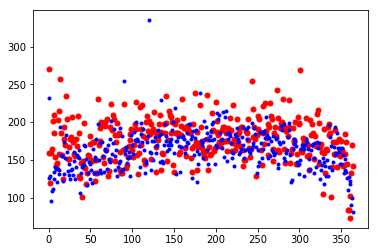

In [73]:
fig = plt.figure()
plt.plot(x2, y_pred, 'r.', markersize=10, label=u'Observations')
plt.plot(x2, y_truth, 'b.', label=u'Prediction')

In [85]:
avg =  np.array([(y_pred - y_truth)**2 for i in xrange(len(y_pred))])


In [86]:
avg

array([[ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       ..., 
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.]])

In [77]:
print np.sqrt(avg.sum()/365)

639.366874337


In [78]:
avg

array([[ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       ..., 
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.],
       [ 1444.,  1089.,   100., ...,  1764.,  4900.,  3721.]])

In [88]:
np.sqrt(np.square(y_truth - y_pred).sum()/365)

33.465991733984936